In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
local_data = pd.read_csv('../data/people/dp-ppl-local-outliers.csv', names=['month', 'num', 'num_articles', 'prop_outlier'])
local_data_prop = pd.read_csv('../data/people/dp-ppl-local-prop-outliers.csv', names=['month', 'num', 'num_articles', 'prop_outlier'])
local_posterior = pd.read_csv('../data/people/dp-ppl-local-posterior.csv', names=['slopes', 'intercepts', 'noise'])
local_posterior_prop = pd.read_csv('../data/people/dp-ppl-local-prop-posterior.csv', names=['slopes', 'intercepts', 'noise'])

In [3]:
state_data = pd.read_csv('../data/people/dp-ppl-state-outliers.csv', names=['month', 'num', 'num_articles', 'prop_outlier'])
state_data_prop = pd.read_csv('../data/people/dp-ppl-state-prop-outliers.csv', names=['month', 'num', 'num_articles', 'prop_outlier'])
state_posterior = pd.read_csv('../data/people/dp-ppl-state-posterior.csv', names=['slopes', 'intercepts', 'noise'])
state_posterior_prop = pd.read_csv('../data/people/dp-ppl-state-prop-posterior.csv', names=['slopes', 'intercepts', 'noise'])

In [4]:
nat_data = pd.read_csv('../data/people/dp-ppl-national-outliers.csv', names=['month', 'num', 'num_articles', 'prop_outlier'])
nat_posterior = pd.read_csv('../data/people/dp-ppl-national-posterior.csv', names=['slopes', 'intercepts', 'noise'])
nat_data_prop = pd.read_csv('../data/people/dp-ppl-national-prop-outliers.csv', names=['month', 'num', 'num_articles', 'prop_outlier'])
nat_posterior_prop = pd.read_csv('../data/people/dp-ppl-national-prop-posterior.csv', names=['slopes', 'intercepts', 'noise'])
nat_data_prop_nt = pd.read_csv('../data/people/dp-ppl-national-prop-no-trump-outliers.csv', names=['month', 'num', 'num_articles', 'prop_outlier'])
nat_posterior_prop_nt = pd.read_csv('../data/people/dp-ppl-national-prop-no-trump-posterior.csv', names=['slopes', 'intercepts', 'noise'])

In [5]:
from tqdm.notebook import tqdm
import numpy as np
import scipy.stats as st

In [7]:
local_posterior_prop.head(5)

,slopes,intercepts,noise
0,-0.000360,0.085432,2.891305
1,-0.000360,0.085432,0.519676
2,-0.000360,0.085432,0.519676
3,-0.000360,0.085432,0.519676
4,-0.000360,0.085432,0.067487
...,...,...,...
9995,0.000249,0.061176,0.039467
9996,0.000249,0.061176,0.039467
9997,0.000249,0.061176,0.039467
9998,0.000249,0.061176,0.039467


In [8]:
def get_ci(data):
    return st.bayes_mvs(data, alpha=.95)

In [9]:
from datetime import datetime, timedelta

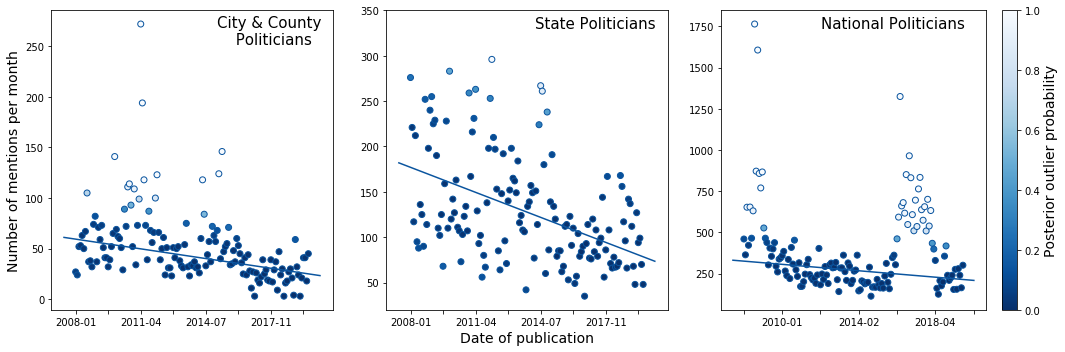

In [19]:
fig, axs = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios': [2.55, 2.55, 3]})

#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)

ax = sns.scatterplot(data=local_data, 
                x="month", 
                y="num", 
                hue="prop_outlier",
                ax=axs[0],
                edgecolor=sns.color_palette('Blues_r')[0],
                linewidth=1,
                palette=sns.color_palette('Blues_r', as_cmap=True))
 
norm = plt.Normalize(0,1)
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

axes = axs[0]
x_vals = np.array(axes.get_xlim())
y_vals = (local_posterior.mean()*10).intercepts + (local_posterior.mean()*10).slopes * x_vals
axs[0].plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[0], alpha=1)

ax = sns.scatterplot(data=state_data, 
                x="month", 
                y="num", 
                hue="prop_outlier",
                ax=axs[1],
                edgecolor=sns.color_palette('Blues_r')[0],
                linewidth=1,
                palette=sns.color_palette('Blues_r', as_cmap=True))

axes = axs[1]
x_vals = np.array(axes.get_xlim())
y_vals = (state_posterior.mean()*15).intercepts + (state_posterior.mean()*15).slopes * x_vals
axs[1].plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[0], alpha=1)

ax = sns.scatterplot(data=nat_data, 
                x="month", 
                y="num", 
                hue="prop_outlier",
                ax=axs[2],
                edgecolor=sns.color_palette('Blues_r')[0],
                linewidth=1,
                palette=sns.color_palette('Blues_r', as_cmap=True))

axes = axs[2]
x_vals = np.array(axes.get_xlim())
y_vals = (nat_posterior.mean()*50).intercepts + (nat_posterior.mean()*50).slopes * x_vals
axs[2].plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[0], alpha=1)
cbar = axs[2].figure.colorbar(sm)
cbar.ax.set_ylabel('Posterior outlier probability', size=14)

# Remove the legend and add a colorbar
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()
axs[1].set_ylabel(None)
axs[2].set_ylabel(None)
axs[0].set_xlabel(None)
axs[2].set_xlabel(None)
axs[1].set_ylim(20,350)
axs[0].set_ylabel('Number of mentions per month', size=14)
axs[1].set_xlabel('Date of publication', size=14)
ticks = [(datetime(2008,1,1) + timedelta(days=30*int(m))).strftime('%Y-%m') if m != -1 else ''
                    for m in [-1,   0,  -1,  40,  -1,  80, -1, 120, -1]]
axs[0].set_xticklabels(ticks)
axs[1].set_xticklabels(ticks)
ticks = [(datetime(2008,1,1) + timedelta(days=30*int(m))).strftime('%Y-%m') 
         if m != -1 else '' for m in [-25,   -1,  25,  -1.,  75, -1, 125., -1, -1]]
axs[2].set_xticklabels(ticks)


fig.tight_layout()
fig.text(0.255, 0.865, 'City & County \n Politicians', weight='roman', ha='center', color='k', size=15)
fig.text(0.555, 0.91, 'State Politicians', weight='roman', ha='center', color='k', size=15)
fig.text(0.83, 0.91, 'National Politicians', weight='roman', ha='center', color='k', size=15)
plt.savefig('absolute_people.png', dpi=200)

In [247]:
(nat_posterior.mean()*50).intercepts, (nat_posterior.mean()*50).slopes, 140*(nat_posterior.mean()*50).slopes

(325.72582616018997, -0.7786307364183914, -109.0083030985748)

In [245]:
(local_posterior.mean()*10).intercepts, (local_posterior.mean()*10).slopes, 140*(local_posterior.mean()*10).slopes

(59.377337592731614, -0.23992610989846708, -33.58965538578539)

In [248]:
(state_posterior.mean()*15).intercepts, (state_posterior.mean()*15).slopes, 140*(state_posterior.mean()*15).slopes

(177.03814220407395, -0.6894173641640515, -96.51843098296722)

In [35]:
def print_res(data):
    print(get_ci(data.slopes))
    print(get_ci(data.intercepts))

In [36]:
print_res(local_posterior_prop)

(Mean(statistic=0.00021150090556565146, minmax=(0.00020861333928938426, 0.00021438847184191865)), Variance(statistic=2.170539732176259e-08, minmax=(2.110376545861739e-08, 2.230702918490779e-08)), Std_dev(statistic=0.00014732751719133324, minmax=(0.00014528569949625914, 0.00014936933488640734)))
(Mean(statistic=0.06268679147596144, minmax=(0.0625718822941254, 0.06280170065779749)), Variance(statistic=3.4372671129776694e-05, minmax=(3.341992680233927e-05, 3.532541545721412e-05)), Std_dev(statistic=0.00586282108969536, minmax=(0.005781568027998493, 0.0059440741513922275)))


In [37]:
print_res(state_posterior_prop/50)

(Mean(statistic=0.0006234785505001736, minmax=(0.0006200837234320637, 0.0006268733775682834)), Variance(statistic=3.000123484413412e-08, minmax=(2.9169658322020158e-08, 3.083281136624809e-08)), Std_dev(statistic=0.00017320864540817276, minmax=(0.0001708081401673566, 0.0001756091506489889)))
(Mean(statistic=0.1391386117383634, minmax=(0.138931476559901, 0.13934574691682577)), Variance(statistic=0.00011168929346714626, minmax=(0.00010859348108804563, 0.0001147851058462469)), Std_dev(statistic=0.01056831554540014, minmax=(0.010421848856087098, 0.010714782234713182)))


In [38]:
print_res(nat_posterior_prop/10)

(Mean(statistic=0.0010423005036813038, minmax=(0.0010277242525956233, 0.0010568767547669844)), Variance(statistic=1.3274150616004323e-06, minmax=(1.3036650290554578e-06, 1.3511650941454069e-06)), Std_dev(statistic=0.0011521350014648598, minmax=(0.0011418280354778974, 0.0011624419674518222)))
(Mean(statistic=0.19214632047825372, minmax=(0.19035390842727162, 0.19393873252923582)), Variance(statistic=0.02007200562368839, minmax=(0.01971287847454278, 0.020431132772834)), Std_dev(statistic=0.1416757058344457, minmax=(0.14040827911851578, 0.1429431325503756)))


In [308]:
local_data_prop['num'] = local_data_prop['num']/local_data_prop['num_articles']
nat_data_prop['num']= nat_data_prop['num']/nat_data_prop['num_articles']

In [309]:
fig, axs = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios': [2.55, 2.55, 3]})

#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)

ax = sns.scatterplot(data=local_data_prop, 
                x="month", 
                y="num", 
                hue="prop_outlier",
                ax=axs[0],
                edgecolor=sns.color_palette('Blues_r')[0],
                linewidth=1,
                palette=sns.color_palette('Blues_r', as_cmap=True))
 
norm = plt.Normalize(0,1)
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

axes = axs[0]
x_vals = np.array(axes.get_xlim())
y_vals = (local_posterior.mean()).intercepts + (local_posterior.mean()*10).slopes * x_vals
axs[0].plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[0], alpha=1)

ax = sns.scatterplot(data=state_data, 
                x="month", 
                y="num", 
                hue="prop_outlier",
                ax=axs[1],
                edgecolor=sns.color_palette('Blues_r')[0],
                linewidth=1,
                palette=sns.color_palette('Blues_r', as_cmap=True))

axes = axs[1]
x_vals = np.array(axes.get_xlim())
y_vals = (state_posterior.mean()*15).intercepts + (state_posterior.mean()*15).slopes * x_vals
axs[1].plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[0], alpha=1)

ax = sns.scatterplot(data=nat_data, 
                x="month", 
                y="num", 
                hue="prop_outlier",
                ax=axs[2],
                edgecolor=sns.color_palette('Blues_r')[0],
                linewidth=1,
                palette=sns.color_palette('Blues_r', as_cmap=True))

axes = axs[2]
x_vals = np.array(axes.get_xlim())
y_vals = (nat_posterior.mean()*50).intercepts + (nat_posterior.mean()*50).slopes * x_vals
axs[2].plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[0], alpha=1)
cbar = axs[2].figure.colorbar(sm)
cbar.ax.set_ylabel('Posterior outlier probability', size=13)

# Remove the legend and add a colorbar
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()
axs[1].set_ylabel(None)
axs[2].set_ylabel(None)
axs[0].set_xlabel(None)
axs[2].set_xlabel(None)
axs[1].set_ylim(20,350)
axs[0].set_ylabel('Number of mentions per month', size=14)
axs[1].set_xlabel('Date of publication', size=14)
ticks = [(datetime(2008,1,1) + timedelta(days=30*int(m))).strftime('%Y-%m') if m != -1 else ''
                    for m in [-1,   0,  -1,  40,  -1,  80, -1, 120, -1]]
axs[0].set_xticklabels(ticks)
axs[1].set_xticklabels(ticks)
ticks = [(datetime(2008,1,1) + timedelta(days=30*int(m))).strftime('%Y-%m') 
         if m != -1 else '' for m in [-25,   -1,  25,  -1.,  75, -1, 125., -1, -1]]
axs[2].set_xticklabels(ticks)

fig.tight_layout()
fig.text(0.255, 0.865, 'City & County \n Politicians', weight='roman', ha='center', color='k', size=15)
fig.text(0.56, 0.91, 'State Politicians', weight='roman', ha='center', color='k', size=15)
fig.text(0.843, 0.91, 'National Politicians', weight='roman', ha='center', color='k', size=15)
plt.savefig('absolute_people.png', dpi=200)

slopes        0.010423
intercepts    1.921463
noise         1.044179
dtype: float64

In [322]:
state_data_prop['num']= state_data_prop['num']/state_data_prop['num_articles']

Text(0.5, 0, 'Date of publication')

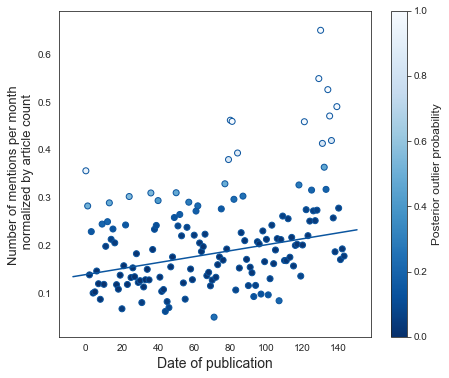

In [325]:
fig, ax = plt.subplots(figsize=(7,6))


data = state_data_prop
posterior = state_posterior_prop

ax = sns.scatterplot(data=data, 
                x="month", 
                y="num", 
                hue="prop_outlier", 
                edgecolor=sns.color_palette('Blues_r')[0],
                linewidth=1,
                palette=sns.color_palette('Blues_r', as_cmap=True),
                    )
 

    
norm = plt.Normalize(0, 1)#data['prop_outlier'].min(), data['prop_outlier'].max())
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.ax.set_ylabel('Posterior outlier probability', size=12)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = (posterior.mean()).intercepts/50 + (posterior.mean()).slopes/50 * x_vals
ax.plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[0])
#for slope, intercept, noise in tqdm(local_posterior.to_numpy()[0:]):
 #   y_vals = intercept*10 + slope * 10 * x_vals
  #  ax.plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[-1], alpha=0.05)

ax.set_ylabel('Number of mentions per month \n normalized by article count', size=13)
ax.set_xlabel('Date of publication', size=14)
#plt.savefig('local_people.png', dpi=200)

Text(0.5, 0, 'Date of publication')

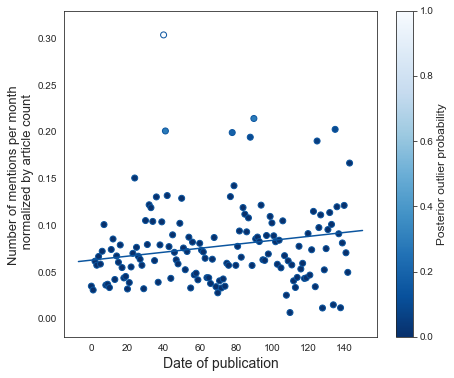

In [315]:
fig, ax = plt.subplots(figsize=(7,6))


data = local_data_prop
posterior = local_posterior_prop

ax = sns.scatterplot(data=data, 
                x="month", 
                y="num", 
                hue="prop_outlier", 
                edgecolor=sns.color_palette('Blues_r')[0],
                linewidth=1,
                palette=sns.color_palette('Blues_r', as_cmap=True),
                    )
 

    
norm = plt.Normalize(0, 1)#data['prop_outlier'].min(), data['prop_outlier'].max())
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.ax.set_ylabel('Posterior outlier probability', size=12)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = (posterior.mean()).intercepts + (posterior.mean()).slopes * x_vals
ax.plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[0])
#for slope, intercept, noise in tqdm(local_posterior.to_numpy()[0:]):
 #   y_vals = intercept*10 + slope * 10 * x_vals
  #  ax.plot(x_vals, y_vals, color=sns.color_palette('Blues_r')[-1], alpha=0.05)

ax.set_ylabel('Number of mentions per month \n normalized by article count', size=13)
ax.set_xlabel('Date of publication', size=14)